In [59]:
#https://zhuanlan.zhihu.com/p/498894160  批次校正

In [1]:
setwd('/import/DB/fel/BJTC-204')

In [2]:
load('/import/mdd.rna/GSE101521.rda')

In [3]:
expr1 = expr3

In [4]:
dim(expr1)

[1] 33714    60

In [5]:
load('/import/mdd.rna/GSE80655.rda')

In [6]:
merged = merge(expr1,expr3)

In [7]:
write.table(merged,file = 'merged.file.txt',row.names = F,quote = F,sep = '\t')

In [8]:
run_count_to_tpm = function(count,hg_len){
    count = read.table(count,header =T,sep = '\t')
    colnames(count)[1] = 'Gene'
    count = count[!duplicated(count$Gene),]
    ## count 转tpm
    len = read.table(hg_len,header =T,sep = '\t')
    library(tidyverse)
    library(dplyr)
    merge<-dplyr::left_join(count,len,by="Gene")#根据基因那列进行合并
    merge <- na.omit(merge)#删除错误值行
    rownames(merge)<-merge[,1]
    merge<-merge[,-1]
    head(merge)#最后一列Length是基因长度
    kb <- merge$Length /1000
    dim(merge)
    countdata <- merge[,1:dim(merge)[2]-1]
    rpk <- countdata /kb
    #tpm <- t(t(rpk)/colSums(rpk) * 1000000)
    fpkm <- t(t(rpk)/colSums(countdata) * 10^6)
    
    write.table(fpkm,file = 'merged.rna-fpkm.txt',quote =F,row.names = T,sep = '\t')

    
}
count = './merged.file.txt'
hg_len = './All_hg19gene_len.txt'
run_count_to_tpm(count,hg_len)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dply

In [9]:
cli$V2 = gsub('-S','',cli$V2 )

In [10]:
cli$V4 = ifelse(cli$V4  =='Male','M','F')

In [12]:
table(cli$V2)


CON MDD 
 29  30 

In [13]:
tail(cliinfo,2)

,V1,V2,V3,V4,V5,V6
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
46,SL7806,19,MD,M,X3634,DLPFC
47,SL7807,39,Control,M,X3433,DLPFC


In [14]:
cliinfo = cliinfo[,c(1,3,2,4)]

In [15]:
tail(cliinfo,2)

,V1,V3,V2,V4
,<chr>,<chr>,<int>,<chr>
46,SL7806,MD,19,M
47,SL7807,Control,39,M


In [16]:
colnames(cliinfo) = c('sample','group','age','gender')

In [17]:
colnames(cli) = c('sample','group','age','gender')

In [18]:
cliinfo$group = ifelse(cliinfo$group == 'MD','MDD','CON')

In [19]:
mergedcli = rbind(cli,cliinfo)

### 读取数据

In [20]:
load('prot.rda')

In [21]:
data = read.table('merged.rna-tpm.txt',header =T,sep = '\t') #%>% tibble::rownames_to_column(.,'Gene')

In [22]:
tail(mergedcli,2)

,sample,group,age,gender
,<chr>,<chr>,<int>,<chr>
105,SL7806,MDD,19,M
106,SL7807,CON,39,M


In [23]:
head(data,2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,SL7403,SL7404,SL7614,SL7625,SL7632,SL7698,SL7801,SL7804,SL7806,SL7807
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0.3797903,0.3300481,0.6252541,0.6044323,0.4475251,1.000572,0.3916624,1.114364,0.7490454,0.254592,...,1.475721,1.511464,1.380246,1.399606,1.591106,1.752184,1.245941,2.459790,1.325850,1.506157
A1BG-AS1,2.0427496,2.8403276,2.1299046,2.4123473,2.0540328,2.255190,1.7555043,3.096769,1.9790765,1.095484,...,7.093559,6.947111,6.215298,7.664829,6.846370,8.586619,8.577855,9.961628,9.408246,8.888012


In [24]:
table(mergedcli$group)


CON MDD 
 53  53 

In [25]:
tail(data,2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,SL7403,SL7404,SL7614,SL7625,SL7632,SL7698,SL7801,SL7804,SL7806,SL7807
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZZEF1,16.04995,19.08981,17.03709,15.62105,17.36556,18.86111,16.83577,28.29099,20.59917,14.17414,...,30.23863,13.56359,26.16618,25.57865,28.79518,30.17153,28.58484,30.29268,31.96041,29.82469
ZZZ3,26.43265,27.48410,29.92625,24.47254,24.79808,22.43922,27.95564,24.06638,27.19248,27.32403,...,21.30238,12.83237,17.42956,17.20162,19.64923,18.75007,17.69393,22.16128,17.99912,17.12804


In [26]:
data = data[unique(prot),]

In [27]:
data = na.omit(data)

In [28]:
dim(data)

[1] 17595   106

In [36]:
data = data[,mergedcli$sample]

In [37]:
anno = data.frame(sample = colnames(data),
          group = mergedcli$group,
          Matrix = c(rep('Matrix1',59),rep('Matrix2',47) ) )

In [39]:
rownames(anno) = anno[,1]
anno = anno[,-1]

In [40]:
exp = log(data+1)

cg=names(tail(sort(apply(exp,1,sd)),5000))
n=exp[cg,]

library(pheatmap)

forplot = na.omit(n)
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

Warning message:
"package 'pheatmap' was built under R version 4.2.3"


[1] 5000  106

In [41]:
library(pheatmap)

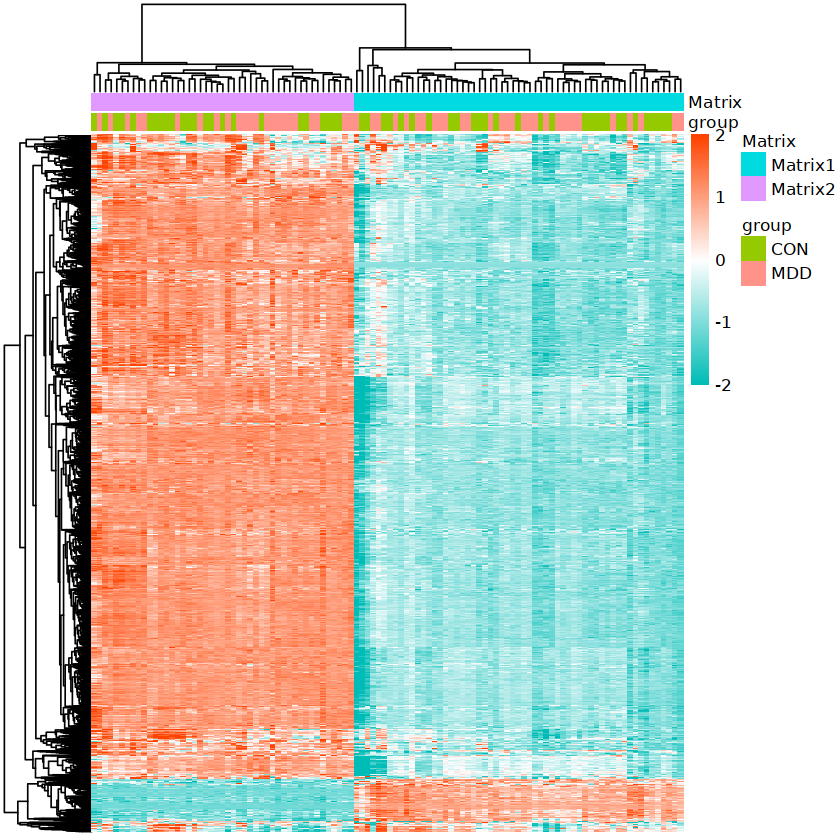

In [42]:
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="none",
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
         annotation_col = anno,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#00BCB6", "white", "#FE4300"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

Warning message:
"package 'FactoMineR' was built under R version 4.2.3"
Warning message:
"package 'factoextra' was built under R version 4.2.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



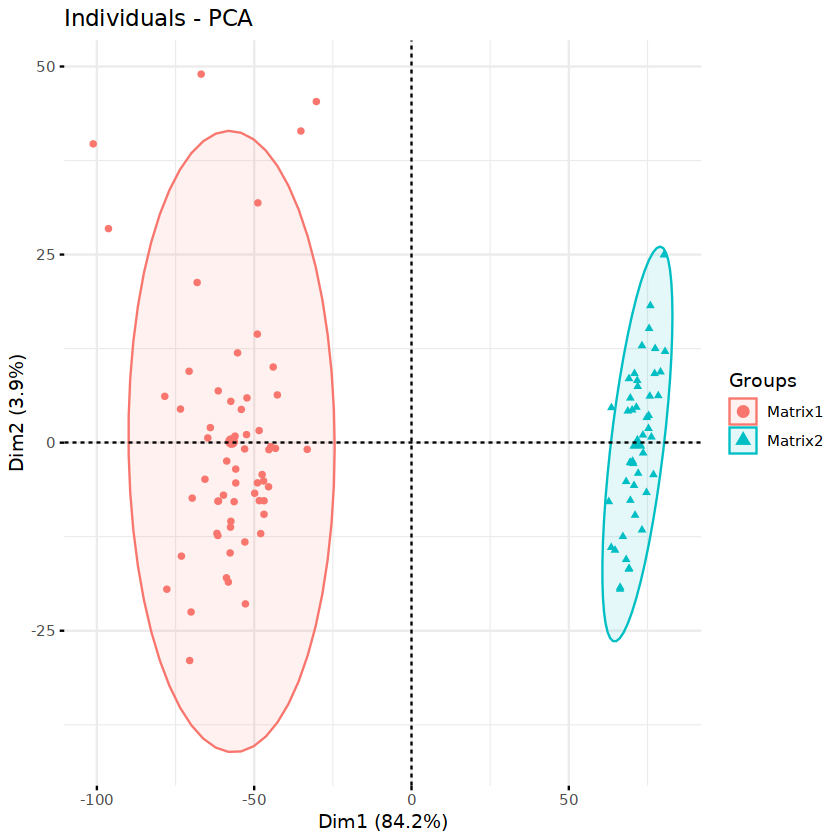

In [43]:
library("FactoMineR")
library("factoextra")
pca.plot = function(dat,col){
  
  df.pca <- PCA(t(dat), graph = FALSE)
  fviz_pca_ind(df.pca,
               geom.ind = "point",
               col.ind = col ,
               addEllipses = TRUE,
               legend.title = "Groups"
  )
}
pca.plot(dat,factor(anno$Matrix))

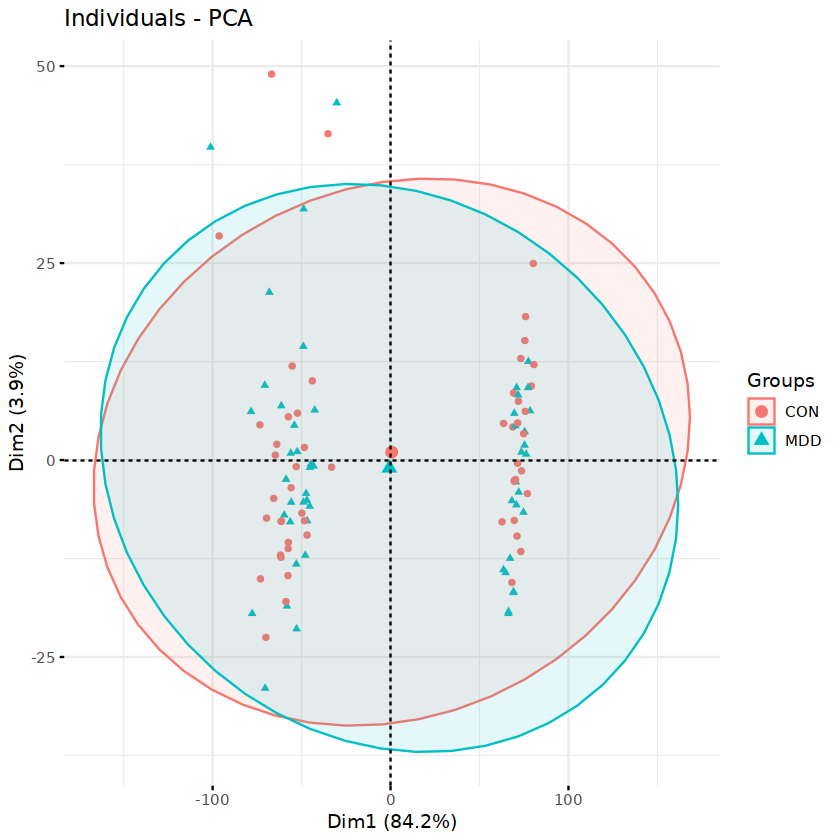

In [44]:
pca.plot(dat,factor(anno$group))

In [45]:
library(sva)

Loading required package: mgcv

Warning message:
"package 'mgcv' was built under R version 4.2.3"
Loading required package: nlme

Warning message:
"package 'nlme' was built under R version 4.2.3"

Attaching package: 'nlme'


The following object is masked from 'package:dplyr':

    collapse


This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.

Loading required package: genefilter

Warning message:
"package 'genefilter' was built under R version 4.2.3"

Attaching package: 'genefilter'


The following object is masked from 'package:readr':

    spec


Loading required package: BiocParallel

Warning message:
"package 'BiocParallel' was built under R version 4.2.3"


In [46]:
batch = anno$Matrix
combat_edata1 = ComBat(dat=data, batch=batch, mod=NULL, par.prior=TRUE,  prior.plots=FALSE) 

Found 394 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




In [47]:
exp = combat_edata1

cg=names(tail(sort(apply(exp,1,sd)),5000))
n=exp[cg,]

library(pheatmap)

forplot = na.omit(n)
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

[1] 5000  106

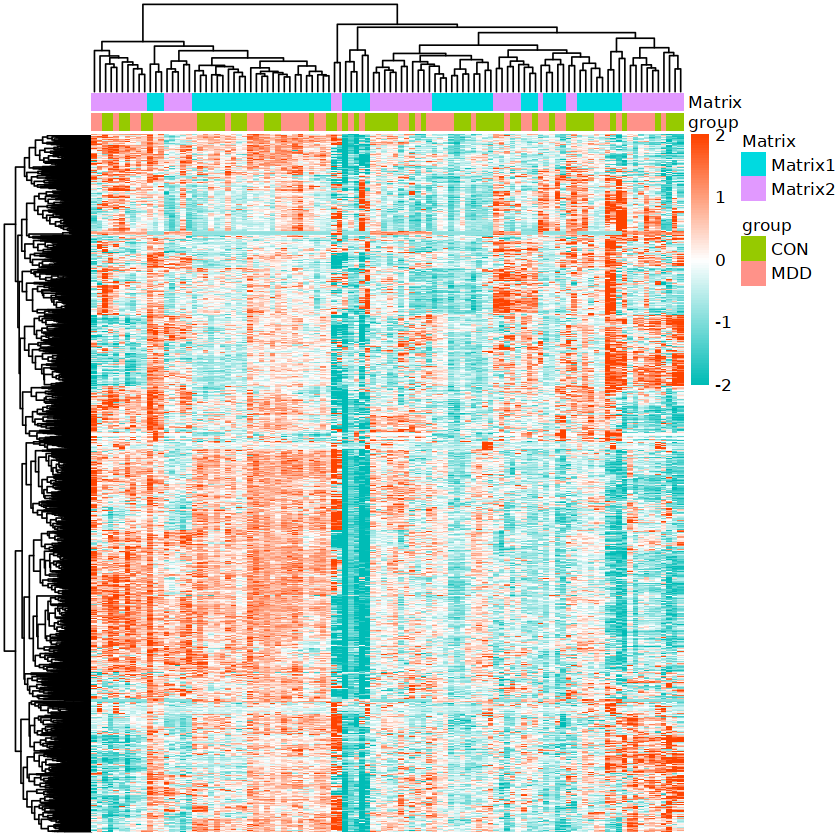

In [48]:
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="none",
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
         annotation_col = anno,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#00BCB6", "white", "#FE4300"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

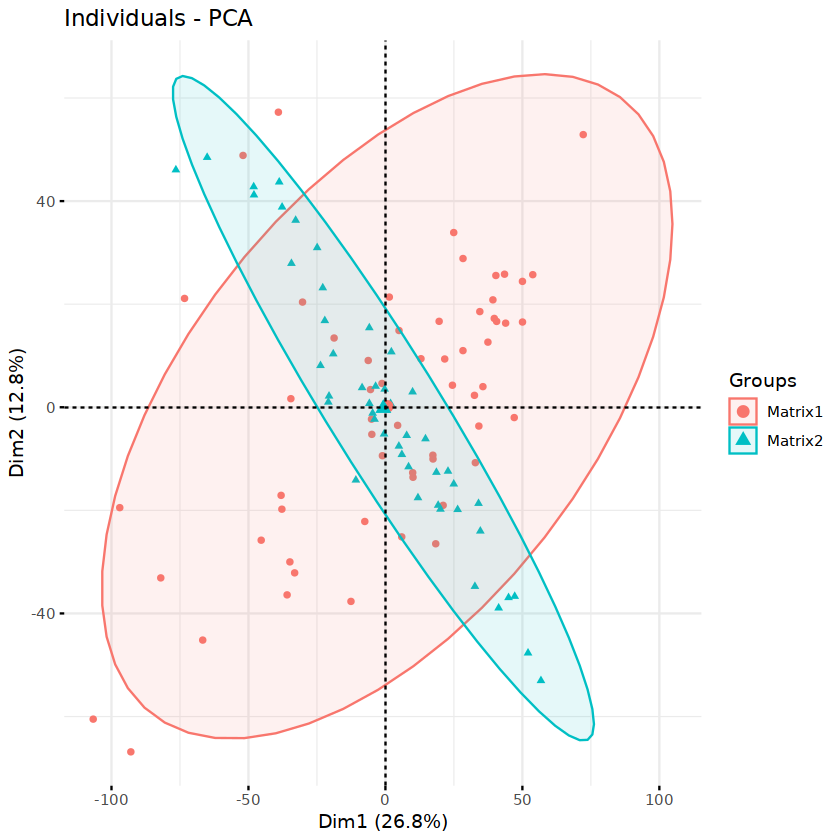

In [49]:
library("FactoMineR")
library("factoextra")
pca.plot = function(dat,col){
  
  df.pca <- PCA(t(dat), graph = FALSE)
  fviz_pca_ind(df.pca,
               geom.ind = "point",
               col.ind = col ,
               addEllipses = TRUE,
               legend.title = "Groups"
  )
}
pca.plot(dat,factor(anno$Matrix))

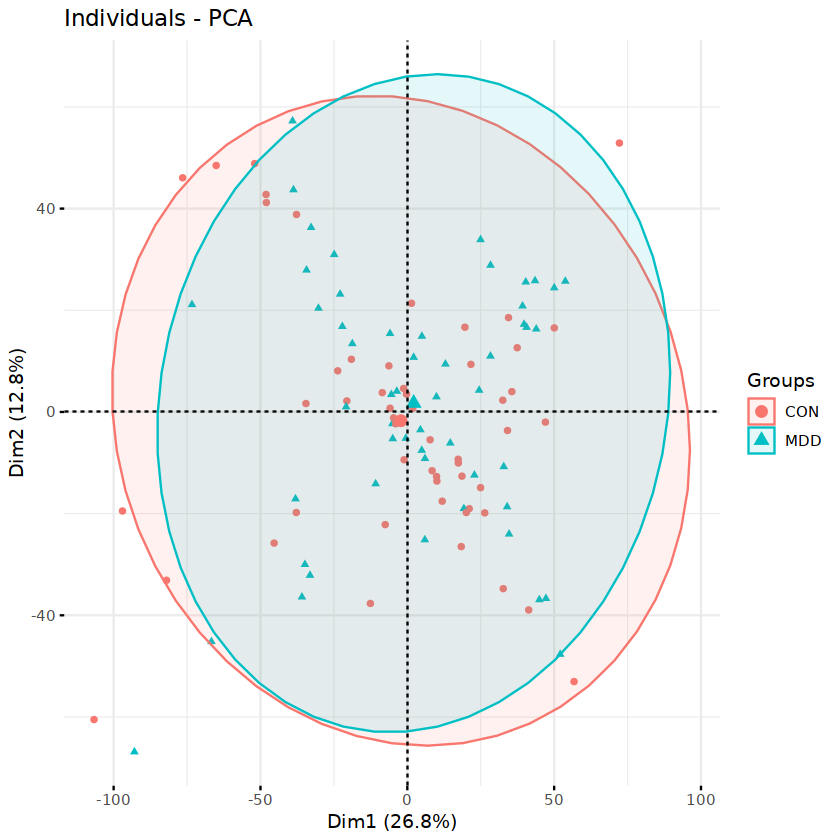

In [50]:
pca.plot(dat,factor(anno$group))

In [51]:
table(cli$group)


CON MDD 
 29  30 

In [52]:
head(cli)

,sample,group,age,gender
,<chr>,<chr>,<int>,<chr>
1,V35,MDD,19,M
2,V36,MDD,67,M
3,V37,MDD,53,M
4,V40,MDD,69,M
5,V45,MDD,62,M
6,V47,MDD,66,M


In [53]:
save(combat_edata1,anno,file = 'combat_edata.rda')